In [167]:
#normalization = "min_max"
#directory = "img"

normalization = "max"
directory = "img_max"

In [361]:
dataset = "ML1M"
results_dir = "./results_ml1m"
ROUNDING_C = 1

#dataset = "KGREC"
#results_dir = "./results_kgrec"
#ROUNDING_C = 3

In [272]:
parse_file_name("result_div_2_c=-0.125_norm_shift_nonlinear_identity_True")

result_div_2_c=-0.125_norm_shift_nonlinear_identity_True
norm_shift_nonlinear_identity_True
div 2 -0.125 norm_shift_nonlinear identity True


('div', '2', -0.125, 'norm_shift_nonlinear', 'identity', True)

In [362]:
import os

def parse_file_name(file_name):
    print(file_name)
    
    file_name = file_name[len("result_"):] # Skip the "result_" prefix
    
    parts = file_name.split("_")
    group_type = parts[0]
    group_size = parts[1]
    c = parts[2].split("=")
    if len(c) == 0 or c[1] == "None":
        constant = None
    else:
        constant = round(float(c[1]), ROUNDING_C)
        
    # Take the unparsed rest
    file_name = "_".join(parts[3:])
        
    print(file_name)
    
    if file_name.endswith("_True"):
        quadratic = True
        file_name = file_name[:-len("_True")]
    elif file_name.endswith("_False"):
        quadratic = False
        file_name = file_name[:-len("_False")]
    
    u_norm_start = file_name.find("_u_norm")
    
    if u_norm_start >= 0:
        u_norm = file_name[u_norm_start + 1:]
        file_name = file_name[:u_norm_start]
    else:
        u_norm = "identity"
        file_name = file_name[:-len("_identity")]
    
    norm = file_name
    
    print(group_type, group_size, constant, norm, u_norm, quadratic)
    
    return group_type, group_size, constant, norm, u_norm, quadratic



In [363]:
def parse_results(file_path):
    with open(file_path) as f:
        lines = f.read().splitlines() 
    
    assert len(lines) > 0
    key_line = lines[0].split(",")
    
    
    results = []
    
    for line in lines[1:]:
        result = dict()
        for i, part in enumerate(line.split(",")):
            result[key_line[i]] = part
        results.append(result)
    return results
    

In [275]:
len(os.listdir(results_dir))

240

In [364]:
results = {}
for file_name in os.listdir(results_dir):
    if os.path.isdir(file_name) or file_name.startswith("."):
        print(f"Skipping directory or \" hidden\" file: {file_name}")
        continue
    key = parse_file_name(file_name)
    _, _, c, norm, u_norm, quadratic = key
    print("------------")
    
    result = parse_results(os.path.join(results_dir, file_name))
    for res in result:
        res_key = (norm, c, u_norm, res["group_type"], res["group_size"], quadratic, res["alg"])
        #res["quadratic"] = quadratic
        results[res_key] = res


result_div_2_c=-0.1_norm_shift_nonlinear_u_norm_min_max_scaler_False
norm_shift_nonlinear_u_norm_min_max_scaler_False
div 2 -0.1 norm_shift_nonlinear u_norm_min_max_scaler False
------------
result_div_2_c=-0.1_norm_shift_nonlinear_u_norm_min_max_scaler_True
norm_shift_nonlinear_u_norm_min_max_scaler_True
div 2 -0.1 norm_shift_nonlinear u_norm_min_max_scaler True
------------
result_div_2_c=-0.2_norm_shift_nonlinear_u_norm_min_max_scaler_False
norm_shift_nonlinear_u_norm_min_max_scaler_False
div 2 -0.2 norm_shift_nonlinear u_norm_min_max_scaler False
------------
result_div_2_c=-0.2_norm_shift_nonlinear_u_norm_min_max_scaler_True
norm_shift_nonlinear_u_norm_min_max_scaler_True
div 2 -0.2 norm_shift_nonlinear u_norm_min_max_scaler True
------------
result_div_2_c=-0.3_norm_shift_nonlinear_u_norm_min_max_scaler_False
norm_shift_nonlinear_u_norm_min_max_scaler_False
div 2 -0.3 norm_shift_nonlinear u_norm_min_max_scaler False
------------
result_div_2_c=-0.3_norm_shift_nonlinear_u_norm_min

result_sim_4_c=0.3999999999999999_norm_shift_nonlinear_u_norm_min_max_scaler_True
norm_shift_nonlinear_u_norm_min_max_scaler_True
sim 4 0.4 norm_shift_nonlinear u_norm_min_max_scaler True
------------
result_sim_4_c=0.6_norm_shift_nonlinear_u_norm_min_max_scaler_False
norm_shift_nonlinear_u_norm_min_max_scaler_False
sim 4 0.6 norm_shift_nonlinear u_norm_min_max_scaler False
------------
result_sim_4_c=0.6_norm_shift_nonlinear_u_norm_min_max_scaler_True
norm_shift_nonlinear_u_norm_min_max_scaler_True
sim 4 0.6 norm_shift_nonlinear u_norm_min_max_scaler True
------------
result_sim_4_c=1.0_norm_shift_nonlinear_identity_False
norm_shift_nonlinear_identity_False
sim 4 1.0 norm_shift_nonlinear identity False
------------
result_sim_4_c=1.0_norm_shift_nonlinear_identity_True
norm_shift_nonlinear_identity_True
sim 4 1.0 norm_shift_nonlinear identity True
------------
result_sim_4_c=2.0_norm_shift_nonlinear_identity_False
norm_shift_nonlinear_identity_False
sim 4 2.0 norm_shift_nonlinear ident

In [290]:
print(len(results.keys()))

2440


In [365]:
import pandas as pd
import numpy as np
df = pd.DataFrame(results).T

In [280]:
df

alg  \
norm_shift_nonlinear -0.125 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0        mf_230_1.0_avg_div_group_2_GreedyLM_1.0   
                                                 mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0  mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0   
                                                 mf_230_1.0_avg_div_group_2_GFAR_1.0                mf_230_1.0_avg_div_group_2_GFAR_1.0   
                                                 mf_230_1.0_fai_div_group_2                                  mf_230_1.0_fai_div_group_2   
                                                 mf_230_1.0_avg_div_group_2                                  mf_230_1.0_avg_div_group_2   
...                                                                                                                                 ...   
                      0.750 identity sim 8 True  mf_230_1.0_fai_sim_group_8                                  mf_230_1.0_fai_sim_group_8   
                                                 mf_230_1.0_xpo_sim_group_8                                  mf_230_1.0_xpo_sim_group_8   
                                                 mf_230_1.0_avg_sim_group_8_GFAR_1.0                mf_230_1.0_avg_sim_group_8_GFAR_1.0   
                                                 mf_230_1.0_avg_sim_group_8_SPGreedy_1.0        mf_230_1.0_avg_sim_group_8_SPGreedy_1.0   
                                                 mf_230_1.0_avg20_sim_group_8                              mf_230_1.0_avg20_sim_group_8   

                                                                                            group_type  \
norm_shift_nonlinear -0.125 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0           div   
                                                 mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0        div   
                                                 mf_230_1.0_avg_div_group_2_GFAR_1.0               div   
                                                 mf_230_1.0_fai_div_group_2                        div   
                                                 mf_230_1.0_avg_div_group_2                        div   
...                                                                                                ...   
                      0.750 identity sim 8 True  mf_230_1.0_fai_sim_group_8                        sim   
                                                 mf_230_1.0_xpo_sim_group_8                        sim   
                                                 mf_230_1.0_avg_sim_group_8_GFAR_1.0               sim   
                                                 mf_230_1.0_avg_sim_group_8_SPGreedy_1.0           sim   
                                                 mf_230_1.0_avg20_sim_group_8                      sim   

                                                                                            group_size  \
norm_shift_nonlinear -0.125 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0             2   
                                                 mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0          2   
                                                 mf_230_1.0_avg_div_group_2_GFAR_1.0                 2   
                                                 mf_230_1.0_fai_div_group_2                          2   
                                                 mf_230_1.0_avg_div_group_2                          2   
...                                                                                                ...   
                      0.750 identity sim 8 True  mf_230_1.0_fai_sim_group_8                          8   
                                                 mf_230_1.0_xpo_sim_group_8                          8   
                                                 mf_230_1.0_avg_sim_group_8_GFAR_1.0                 8   
                                                 mf_230_1.0_avg_sim_group_8_SPGreedy_1.0             8   
                        

In [281]:
df.sort_index().loc[('norm_shift_nonlinear', -3.0, "identity", "sim", "4", False)]

KeyError: ('norm_shift_nonlinear', -3.0, 'identity', 'sim', '4', False)

In [24]:
identity, _ = get_df_data(False, "AR_avg", "sim")
identity["4"]

AR_avg_-3.0  AR_avg_-2.5  AR_avg_-2.0  AR_avg_-1.5  AR_avg_-1.0  \
AVG           0.408451     0.538462     0.743802     0.943548     1.000000   
EP-FuzzDA     0.000000     0.000000     0.000000     0.185484     0.617284   
FuzzDA        0.267606     0.307692     0.322314     0.354839     0.604938   
GFAR          1.000000     0.993007     0.842975     0.346774     0.230453   
GreedyLM      0.661972     0.818182     1.000000     1.000000     0.880658   
SPGreedy      0.577465     0.699301     0.876033     0.967742     0.938272   
FAI           0.936620     0.874126     0.603306     0.000000     0.000000   
XPO           0.964789     1.000000     0.925620     0.491935     0.345679   

           AR_avg_-0.5  AR_avg_0.0  AR_avg_1.0  AR_avg_2.0  AR_avg_3.0  
AVG           1.000000    1.000000    1.000000    1.000000    1.000000  
EP-FuzzDA     0.750000    0.804348    0.805882    0.805882    0.805882  
FuzzDA        0.691489    0.749012    0.747059    0.747059    0.747059  
GFAR          0.178191    0.152174    0.150980    0.150980    0.150980  
GreedyLM      0.816489    0.786561    0.786275    0.786275    0.786275  
SPGreedy      0.906915    0.891304    0.892157    0.892157    0.892157  
FAI           0.000000    0.000000    0.000000    0.000000    0.000000  
XPO           0.276596    0.239130    0.239216    0.237255    0.237255

In [367]:
whitelist_mapping = {
        "FuzzyDHondtDirectOptimize_1.0": "EP-FuzzDA",
        "GFAR_1.0": "GFAR",
        "GreedyLM_1.0": "GreedyLM",
        "SPGreedy_1.0": "SPGreedy",
        "AVG": "AVG",
        "fai": "FAI",
        "xpo": "XPO",
        "avg20": "AVG",
        "FuzzyDHondt_1.0": "FuzzDA"
}

def get_alg_name(alg_name):
    group_type = "_sim_group_"
    idx = alg_name.find(group_type)
    if idx < 0:
        group_type = "_div_group_"
        idx = alg_name.find(group_type)
    alg_name = alg_name[:idx] + alg_name[idx + len(group_type) + 1:]
    if dataset == "ML1M":
        alg_name = alg_name.replace("mf_30_1.0_avg_", "").replace("mf_30_1.0_", "")
    elif dataset == "KGREC":
        alg_name = alg_name.replace("mf_230_1.0_avg_", "").replace("mf_230_1.0_", "")
    else:
        assert False
    if alg_name in whitelist_mapping:
        return whitelist_mapping[alg_name]
    return alg_name

def get_df_filtered(c, u_norm, group_size, q=False, target_field="AR_avg", group_type="sim"):
    
    df_filtered = df.sort_index().loc[('norm_shift_nonlinear', c, u_norm, group_type, group_size, q)]
    df_filtered.alg = df_filtered.alg.map(get_alg_name)
    df_filtered = df_filtered[df_filtered.alg.isin(whitelist_mapping.values())]
    df_filtered[target_field] = df_filtered[target_field].astype(float)
    if normalization == "min_max":
        df_filtered[target_field] = (df_filtered[target_field] - df_filtered[target_field].min()) / (df_filtered[target_field].max() - df_filtered[target_field].min())
    elif normalization == "max":
        df_filtered[target_field] = df_filtered[target_field] / df_filtered[target_field].max()
    else:
        assert False
    df_filtered.index = df_filtered.index.map(get_alg_name)
    return df_filtered[target_field]

In [368]:
if dataset == "KGREC":
    c_identity = [-0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125, 0.0, 0.25, 0.5, 0.75]
else:
    c_identity = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 1.0, 2.0, 3.0]
c_u_norm = [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.2, 0.4, 0.6]

def get_df_data(quadratic, metric, group_type):

    df_u_norm = dict()
    df_identity = dict()

    for group_size in ["2", "4", "8"]:
        xs_identity = [get_df_filtered(round(c, ROUNDING_C), 'identity', group_size, quadratic, metric, group_type) for c in c_identity]
        xs_u_norm = [get_df_filtered(round(c, ROUNDING_C), 'u_norm_min_max_scaler', group_size, quadratic, metric, group_type) for c in c_u_norm]
        df_u_norm[group_size] = pd.concat(xs_u_norm, axis=1, keys=[f"{metric}_{c}" for c in c_u_norm])
        df_identity[group_size] = pd.concat(xs_identity, axis=1, keys=[f"{metric}_{c}" for c in c_identity])
        
    return df_identity, df_u_norm

In [294]:
import matplotlib.pyplot as plt

def plot_data(quadratic, metric, group_type):
    df_identity, df_u_norm = get_df_data(quadratic, metric, group_type)
    
    #depict AR_avg
    linestyles = ["-","--",":","-.","-","--",":","-."]
    markers = [".","v","^","+","x","*","s","D"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig,ax = plt.subplots(2,3,figsize=(14,7),sharex=False)
    i = 0
    for d in [df_identity, df_u_norm]:
        j = 0
        for size in ["2","4","8"]:               
            #vals = df_dictionary[(sim,size)][AR_avg]
            vals = d[size]
            k = 0
            for a in sorted(vals.index.tolist()):
                ax[i,j].plot(vals.loc[a].values, marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
                k += 1
            #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
            j += 1
        i += 1

    ax[0,0].set_xticks(range(len(c_identity)))
    ax[0,1].set_xticks(range(len(c_identity)))
    ax[0,2].set_xticks(range(len(c_identity)))
    ax[0,0].set_xticklabels(c_identity,
                           rotation = 45, ha="right")
    ax[0,1].set_xticklabels(c_identity,
                           rotation = 45, ha="right")
    ax[0,2].set_xticklabels(c_identity,
                           rotation = 45, ha="right")

    ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
    ax[0,0].set_title("group size = 2")
    ax[0,1].set_title("group size = 4")
    ax[0,2].set_title("group size = 8")

    ax[0,0].set_ylabel("without u_norm")
    ax[1,0].set_ylabel("with u_norm")

    ax[1,0].set_xticks(range(len(c_u_norm)))
    ax[1,1].set_xticks(range(len(c_u_norm)))
    ax[1,2].set_xticks(range(len(c_u_norm)))
    ax[1,0].set_xticklabels(c_u_norm,
                           rotation = 45, ha="right")
    ax[1,1].set_xticklabels(c_u_norm,
                           rotation = 45, ha="right")
    ax[1,2].set_xticklabels(c_u_norm,
                           rotation = 45, ha="right")


    if group_type == "div":
        fig.suptitle(f"{dataset} dataset, {metric}, quadratic={quadratic}, div")
        plt.tight_layout()
        plt.savefig(f"{directory}/{dataset}_{metric.replace('/','-')}_{quadratic}_div.png", dpi=300)
    else:
        fig.suptitle(f"{dataset} dataset, {metric}, quadratic={quadratic}")
        plt.tight_layout()
        plt.savefig(f"{directory}/{dataset}_{metric.replace('/','-')}_{quadratic}.png", dpi=300)

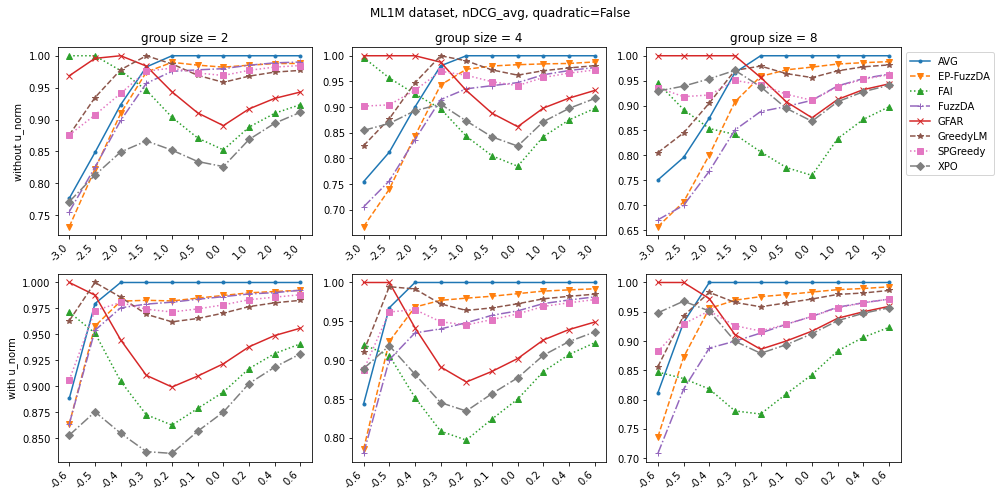

In [177]:
plot_data(False, "nDCG_avg", "sim")

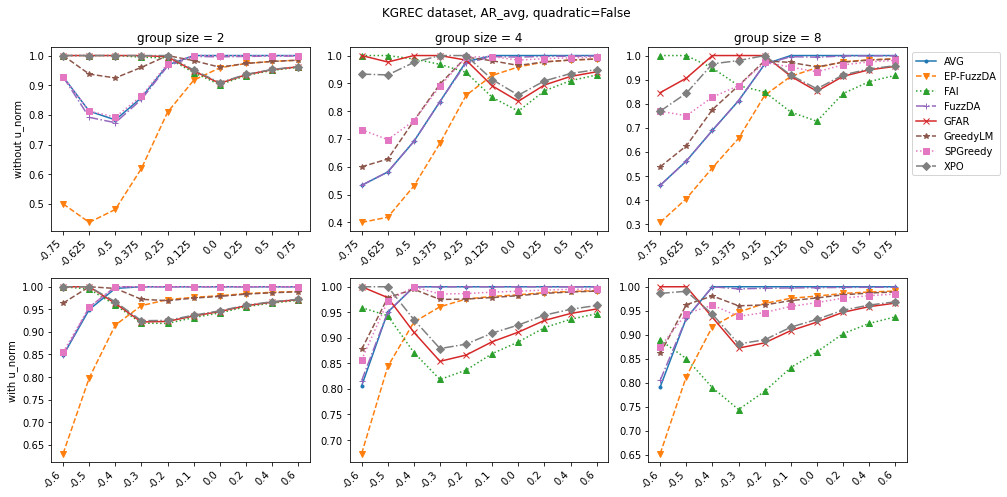

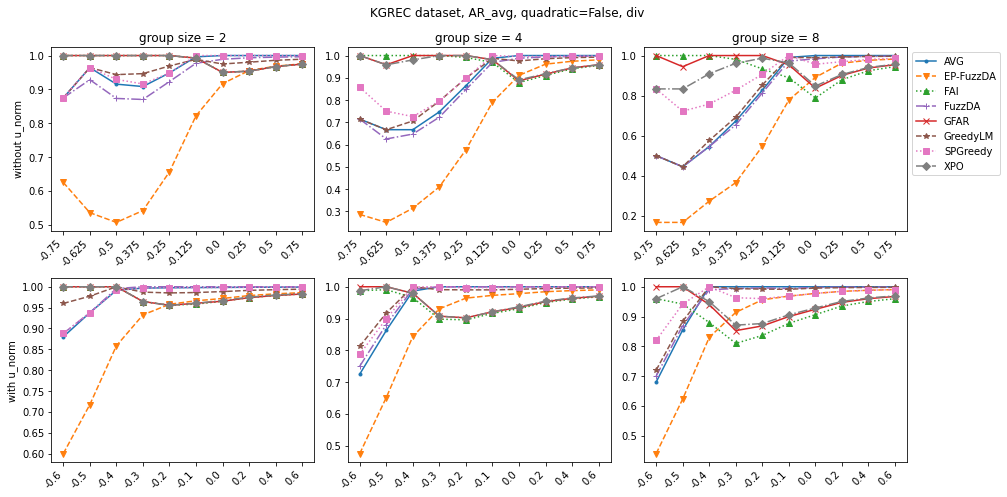

In [295]:
plot_data(False, "AR_avg", "sim")
plot_data(False, "AR_avg", "div")

In [296]:
plot_data(True, "AR_avg", "sim")
plot_data(True, "AR_avg", "div")

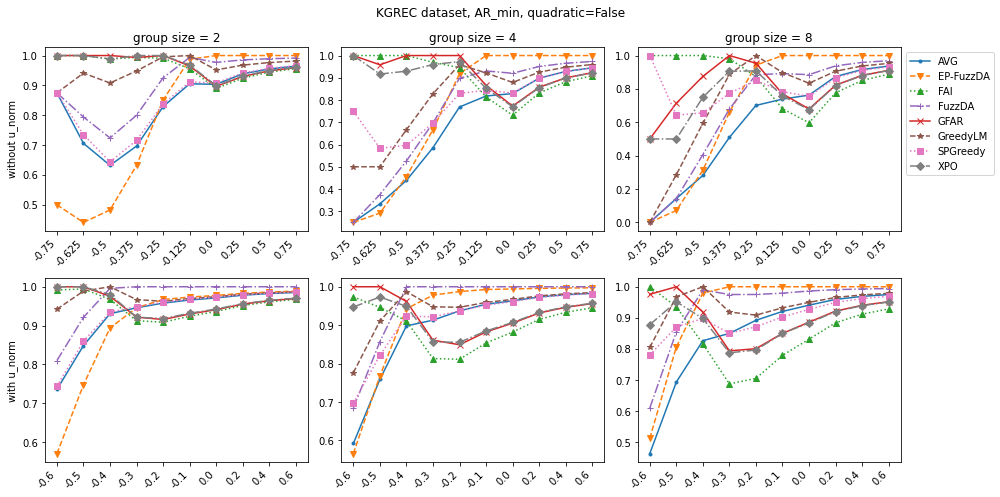

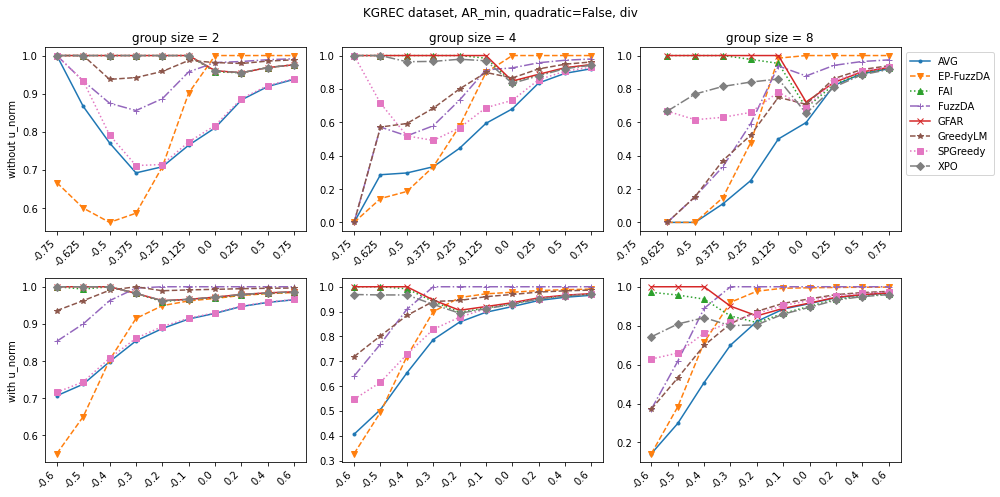

In [297]:
plot_data(False, "AR_min", "sim")
plot_data(False, "AR_min", "div")

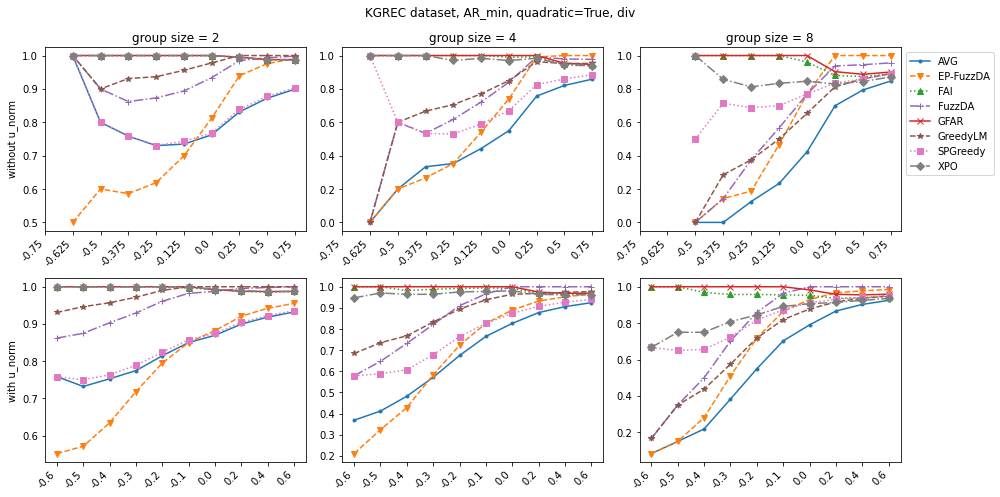

In [298]:
plot_data(True, "AR_min", "sim")
plot_data(True, "AR_min", "div")

In [299]:
plot_data(False, "AR_min/max", "sim")
plot_data(False, "AR_min/max", "div")

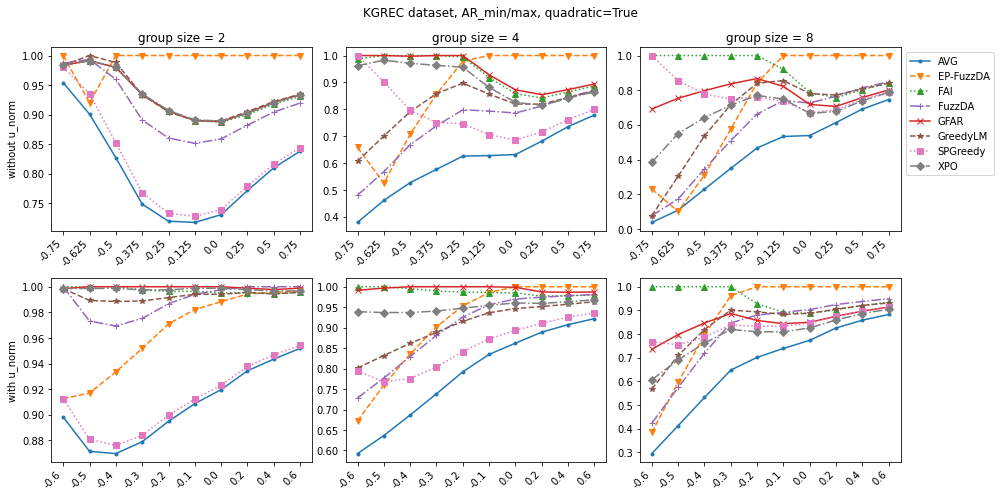

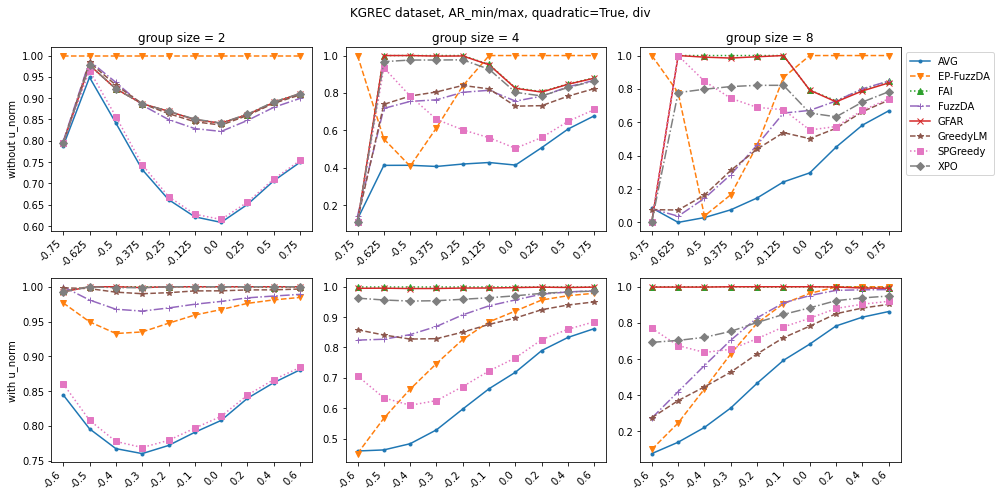

In [300]:
plot_data(True, "AR_min/max", "sim")
plot_data(True, "AR_min/max", "div")

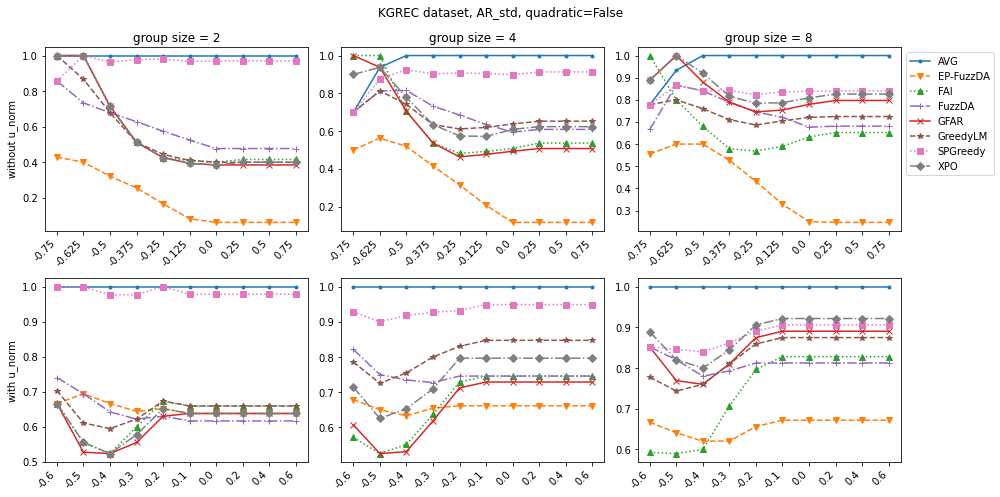

In [301]:
plot_data(False, "AR_std", "sim")
plot_data(False, "AR_std", "div")

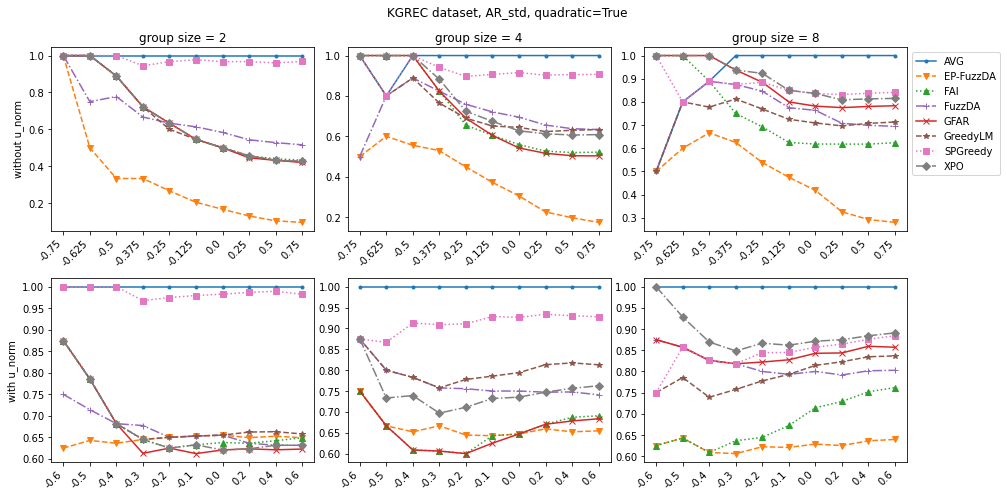

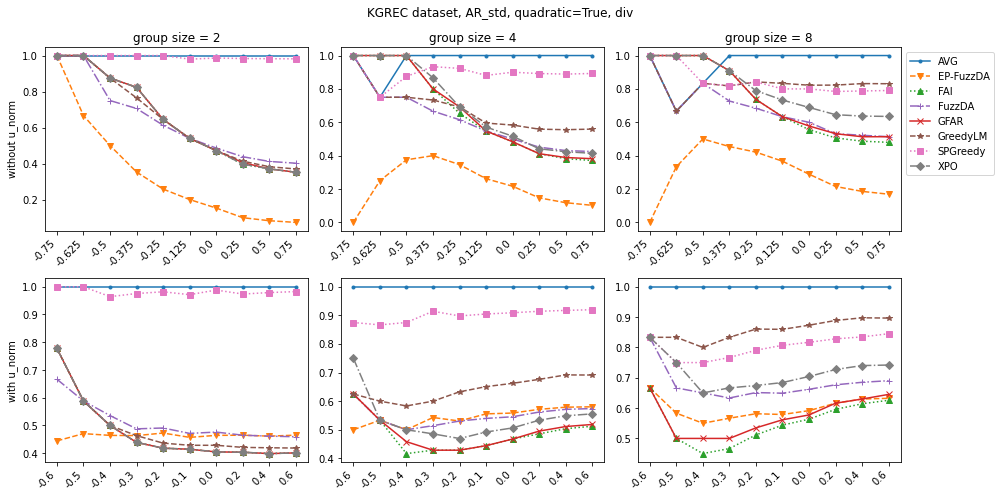

In [302]:
plot_data(True, "AR_std", "sim")
plot_data(True, "AR_std", "div")

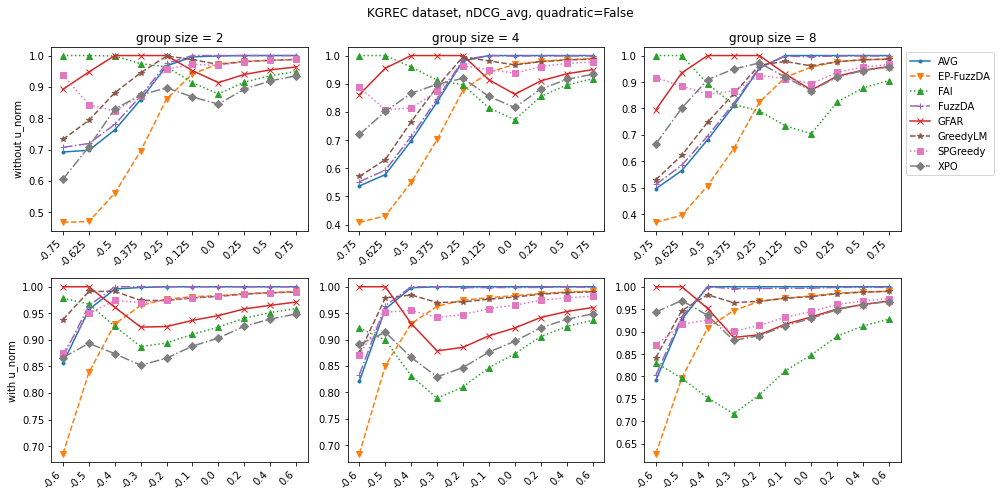

In [303]:
plot_data(False, "nDCG_avg", "sim")
plot_data(False, "nDCG_avg", "div")

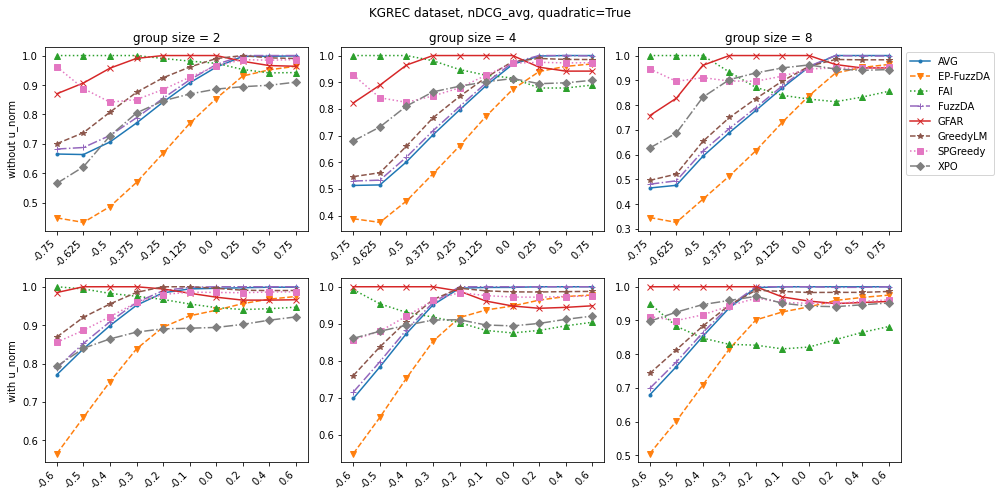

In [304]:
plot_data(True, "nDCG_avg", "sim")
plot_data(True, "nDCG_avg", "div")

In [305]:
plot_data(False, "nDCG_min", "sim")
plot_data(False, "nDCG_min", "div")

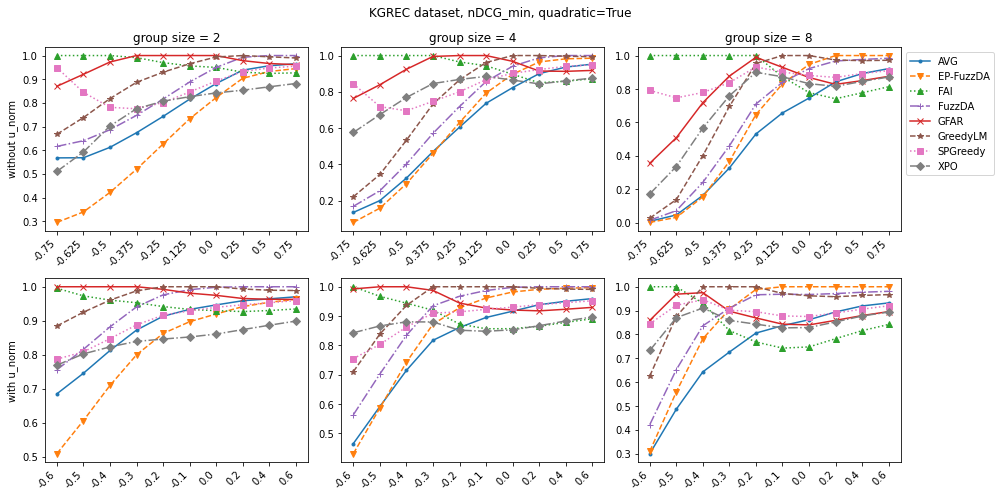

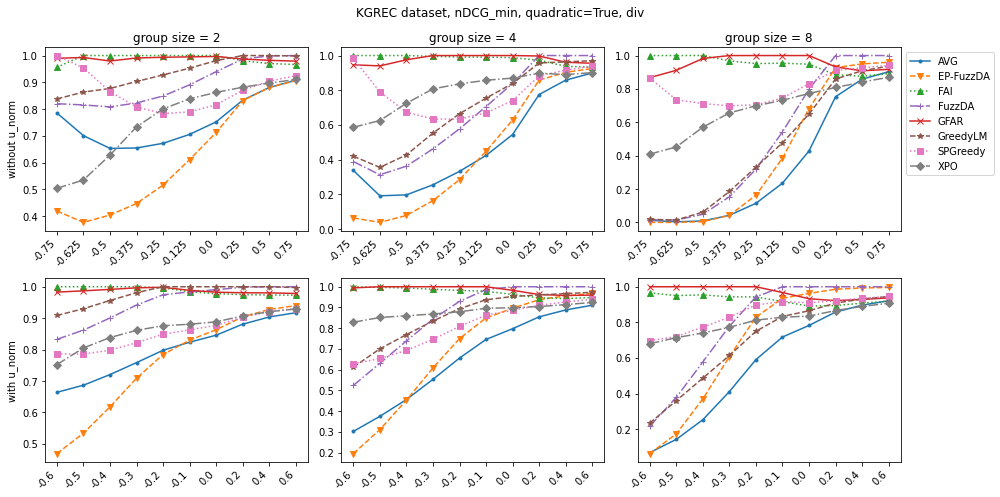

In [306]:
plot_data(True, "nDCG_min", "sim")
plot_data(True, "nDCG_min", "div")

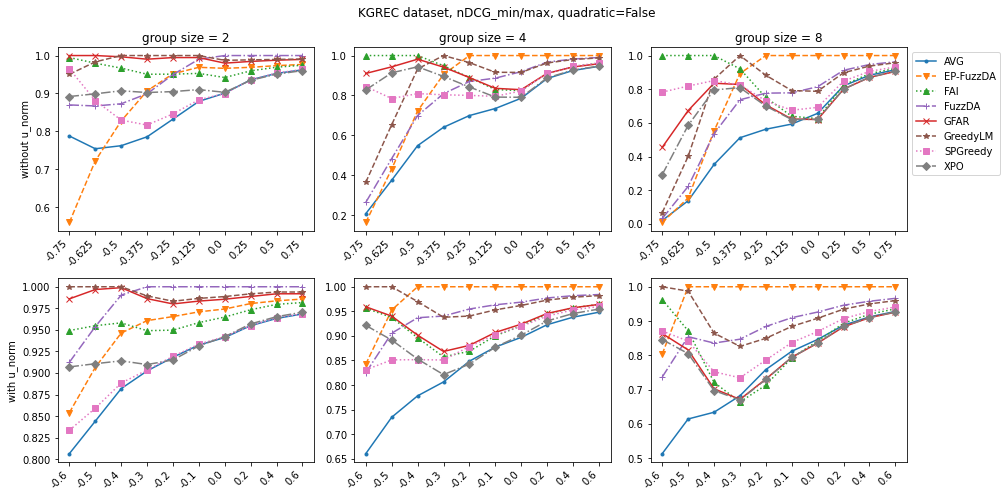

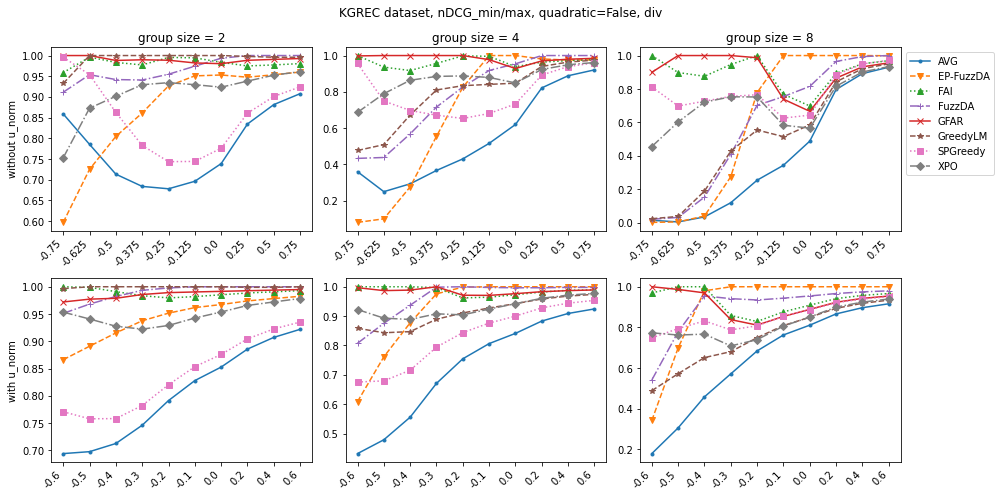

In [307]:
plot_data(False, "nDCG_min/max", "sim")
plot_data(False, "nDCG_min/max", "div")

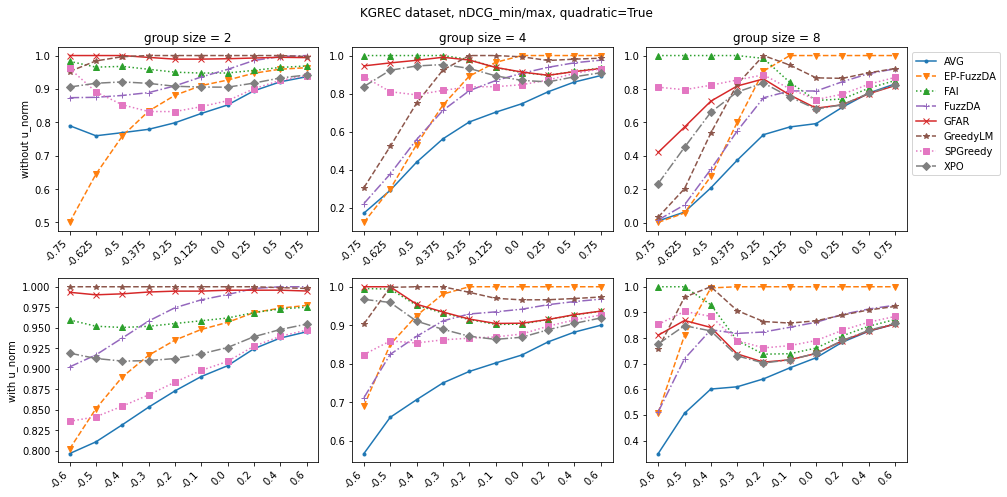

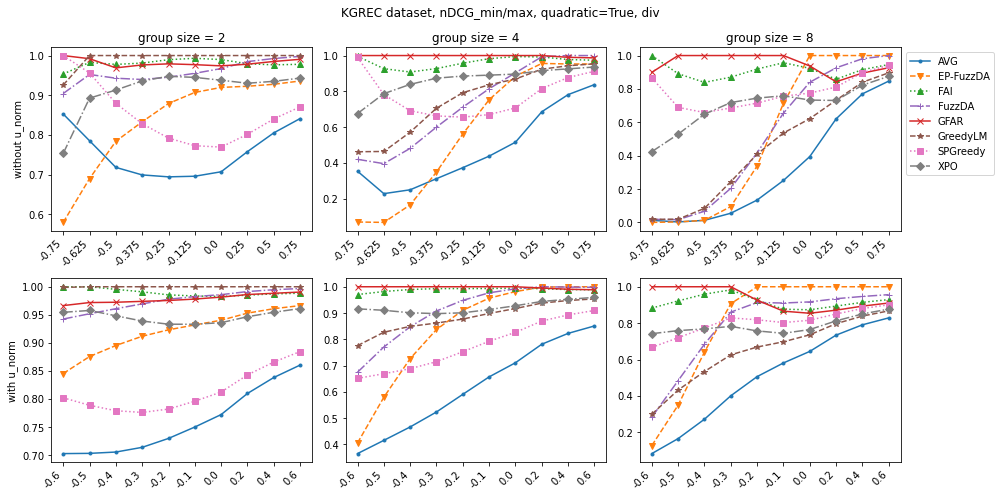

In [308]:
plot_data(True, "nDCG_min/max", "sim")
plot_data(True, "nDCG_min/max", "div")

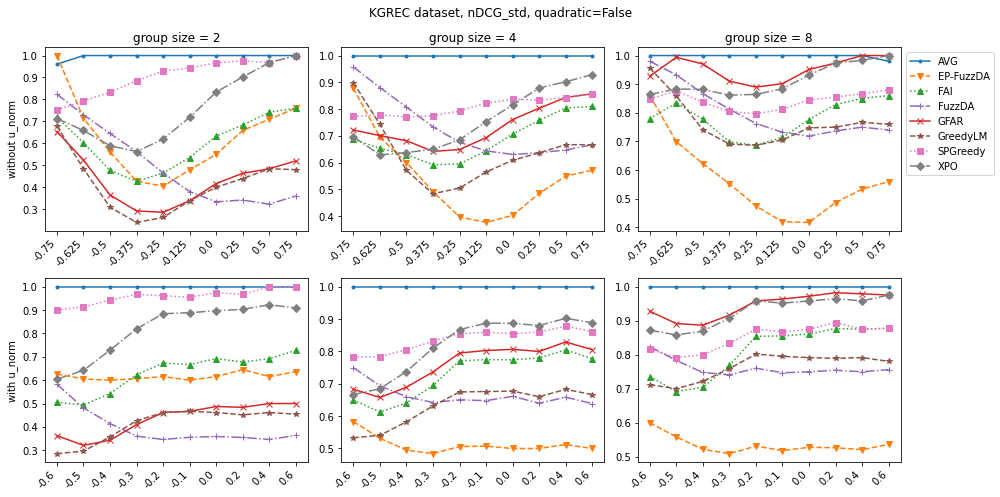

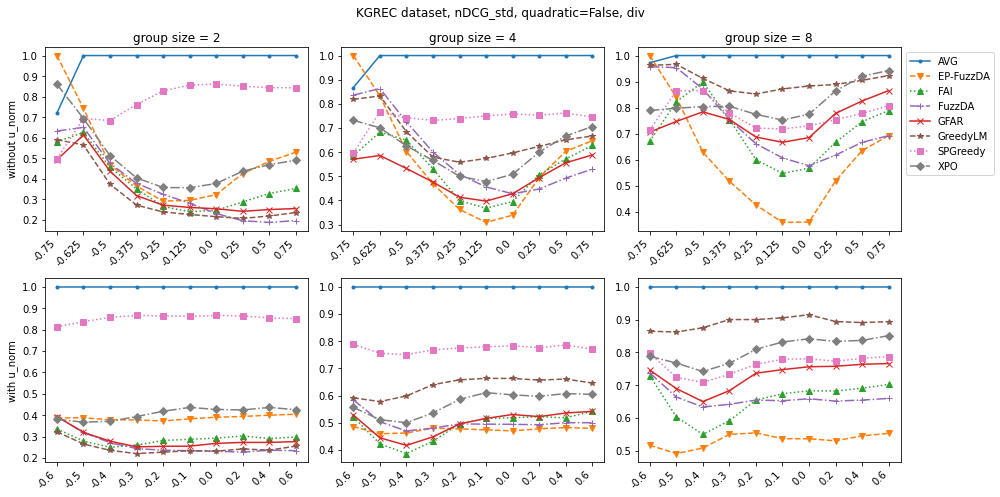

In [309]:
plot_data(False, "nDCG_std", "sim")
plot_data(False, "nDCG_std", "div")

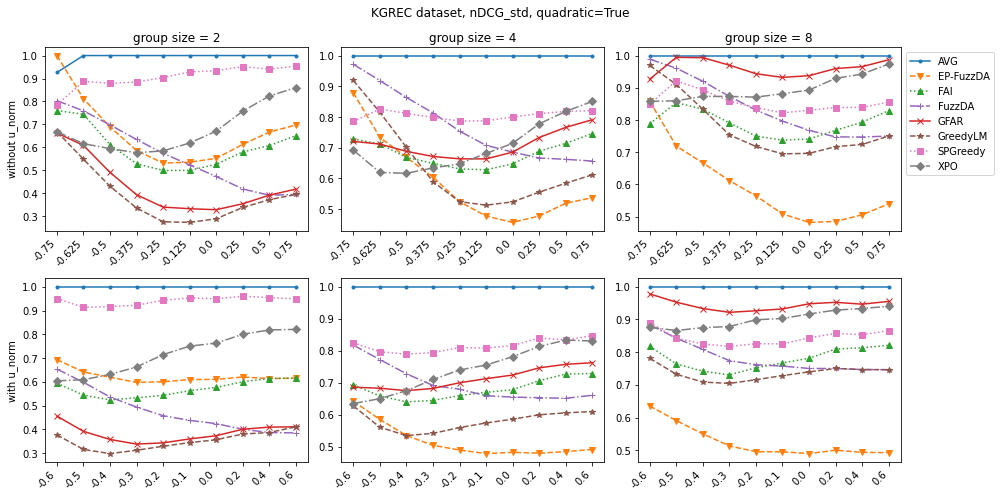

In [310]:
plot_data(True, "nDCG_std", "sim")
plot_data(True, "nDCG_std", "div")

In [251]:
df

alg  \
norm_shift_nonlinear -0.1 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0        mf_230_1.0_avg_div_group_2_GreedyLM_1.0   
                                               mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0  mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0   
                                               mf_230_1.0_avg_div_group_2_GFAR_1.0                mf_230_1.0_avg_div_group_2_GFAR_1.0   
                                               mf_230_1.0_fai_div_group_2                                  mf_230_1.0_fai_div_group_2   
                                               mf_230_1.0_avg_div_group_2                                  mf_230_1.0_avg_div_group_2   
...                                                                                                                               ...   
                      0.8 identity sim 8 True  mf_230_1.0_fai_sim_group_8                                  mf_230_1.0_fai_sim_group_8   
                                               mf_230_1.0_xpo_sim_group_8                                  mf_230_1.0_xpo_sim_group_8   
                                               mf_230_1.0_avg_sim_group_8_GFAR_1.0                mf_230_1.0_avg_sim_group_8_GFAR_1.0   
                                               mf_230_1.0_avg_sim_group_8_SPGreedy_1.0        mf_230_1.0_avg_sim_group_8_SPGreedy_1.0   
                                               mf_230_1.0_avg20_sim_group_8                              mf_230_1.0_avg20_sim_group_8   

                                                                                          group_type  \
norm_shift_nonlinear -0.1 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0           div   
                                               mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0        div   
                                               mf_230_1.0_avg_div_group_2_GFAR_1.0               div   
                                               mf_230_1.0_fai_div_group_2                        div   
                                               mf_230_1.0_avg_div_group_2                        div   
...                                                                                              ...   
                      0.8 identity sim 8 True  mf_230_1.0_fai_sim_group_8                        sim   
                                               mf_230_1.0_xpo_sim_group_8                        sim   
                                               mf_230_1.0_avg_sim_group_8_GFAR_1.0               sim   
                                               mf_230_1.0_avg_sim_group_8_SPGreedy_1.0           sim   
                                               mf_230_1.0_avg20_sim_group_8                      sim   

                                                                                          group_size  \
norm_shift_nonlinear -0.1 identity div 2 False mf_230_1.0_avg_div_group_2_GreedyLM_1.0             2   
                                               mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0          2   
                                               mf_230_1.0_avg_div_group_2_GFAR_1.0                 2   
                                               mf_230_1.0_fai_div_group_2                          2   
                                               mf_230_1.0_avg_div_group_2                          2   
...                                                                                              ...   
                      0.8 identity sim 8 True  mf_230_1.0_fai_sim_group_8                          8   
                                               mf_230_1.0_xpo_sim_group_8                          8   
                                               mf_230_1.0_avg_sim_group_8_GFAR_1.0                 8   
                                               mf_230_1.0_avg_sim_group_8_SPGreedy_1.0             8   
                                               mf_230_1.0_avg20_sim_group_8                 

In [311]:
def plot_data_2(metric):
    df_identity, df_u_norm = get_aggregated(metric, "identity", c_identity), get_aggregated(metric, "u_norm_min_max_scaler", c_u_norm)
    
    #depict AR_avg
    linestyles = ["-","--",":","-.","-","--",":","-."]
    markers = [".","v","^","+","x","*","s","D"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig,ax = plt.subplots(1,2,figsize=(14,7),sharex=False)
    i = 0
    for vals in [df_identity, df_u_norm]:
        #j = 0
        #for size in ["2","4","8"]:               
            #vals = df_dictionary[(sim,size)][AR_avg]
            #k = 0
        for k, a in enumerate(sorted(vals.index.tolist())):
            ax[i].plot(vals.loc[a].values, marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            #    k += 1
            #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
            #j += 1
        i += 1

    ax[0].set_xticks(range(len(c_identity)))
    #ax[0,1].set_xticks(range(len(c_identity)))
    #ax[0,2].set_xticks(range(len(c_identity)))
    ax[0].set_xticklabels(c_identity,
                           rotation = 45, ha="right")

    ax[1].legend(bbox_to_anchor=(1.0, 1.0))
    ax[0].set_title("group size = 8")
    ax[1].set_title("group size = 8")
    #ax[0,1].set_title("group size = 4")
    #ax[0,2].set_title("group size = 8")

    ax[0].set_ylabel("without u_norm")
    ax[1].set_ylabel("with u_norm")

    ax[1].set_xticks(range(len(c_u_norm)))
    ax[1].set_xticklabels(c_u_norm,
                           rotation = 45, ha="right")
    

    
    fig.suptitle(f"{dataset} dataset, {metric}, aggregated results")
    plt.tight_layout()
    plt.savefig(f"aggregated/{dataset}_{metric.replace('/','-')}_{quadratic}.png", dpi=300)

In [312]:
from collections import defaultdict
df_sorted = df.sort_index()
result_dfs = defaultdict(lambda: list())
for n in ["u_norm_min_max_scaler", "identity"]:
    constants = c_u_norm if n == "u_norm_min_max_scaler" else c_identity
    for c in constants:
        for group_type in ["sim", "div"]:
            for group_size in ["2", "4", "8"]:
                for q in [True, False]:
                    d = df_sorted.loc[("norm_shift_nonlinear", c, n, group_type, group_size, q)]
                    d.alg = d.alg.map(get_alg_name)
                    d = d[d.alg.isin(whitelist_mapping.values())]
                    d.index = d.index.map(get_alg_name)
                    for col in ["AR_avg", "AR_min", "AR_min/max", "AR_std", "nDCG_avg", "nDCG_min", "nDCG_min/max", "nDCG_std"]:
                        d[col] = d[col].astype(float)
                        d[col] = d[col] / d[col].max()
                    result_dfs[(n, c)].append(d)

In [107]:
result_dfs[("identity", 0.0)][2]

alg group_type group_size    AR_avg    AR_min  AR_min/max  \
AVG              AVG        sim          4  0.993947  0.786161    0.610860   
EP-FuzzDA  EP-FuzzDA        sim          4  0.911173  1.000000    1.000000   
FuzzDA        FuzzDA        sim          4  0.932228  0.734311    0.592760   
GFAR            GFAR        sim          4  0.935649  0.910603    0.828054   
GreedyLM    GreedyLM        sim          4  0.995526  0.907205    0.749623   
SPGreedy    SPGreedy        sim          4  1.000000  0.832827    0.656109   
FAI              FAI        sim          4  0.901171  0.875380    0.823529   
XPO              XPO        sim          4  0.948151  0.912390    0.815988   

             AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG        1.000000  0.993056  0.870334      0.810606  1.000000  
EP-FuzzDA  0.398429  0.956597  0.919450      0.940657  0.659794  
FuzzDA     0.945380  0.928819  0.805501      0.770202  0.989691  
GFAR       0.612046  0.986111  0.897839      0.867424  0.845361  
GreedyLM   0.766180  1.000000  1.000000      1.000000  0.536082  
SPGreedy   0.926300  0.984375  0.905697      0.872475  0.835052  
FAI        0.597830  0.904514  0.829077      0.866162  0.793814  
XPO        0.638608  0.909722  0.825147      0.851010  0.824742

In [313]:
def get_aggregated(metric, norm, constants):
    df = pd.DataFrame(columns=constants)
    for c in constants:
        r = None
        n = 0
        for d in result_dfs[(norm, c)]:
            if r is None:
                r = d[metric]
            else:
                r = r + d[metric]
            n += 1
        r = r / n
        df[c] = r
    return df

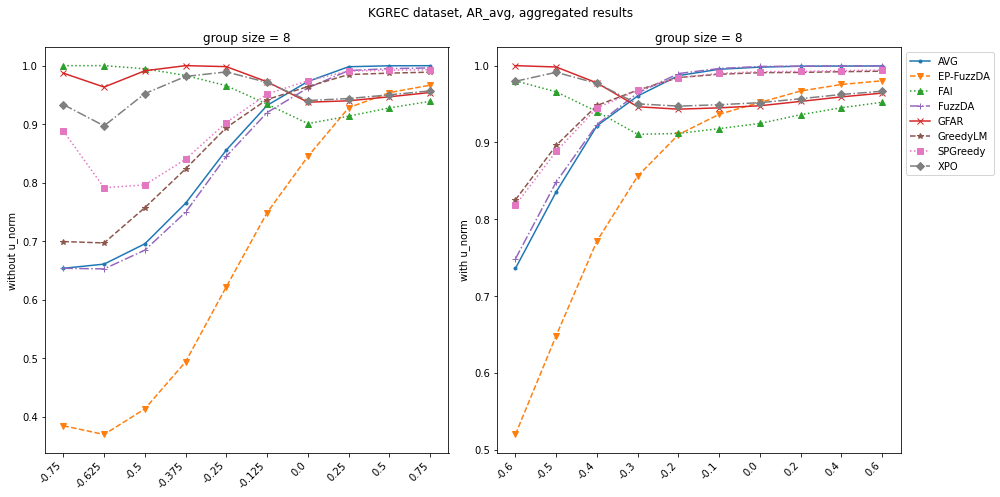

In [314]:
plot_data_2("AR_avg")

In [315]:
plot_data_2("AR_min")

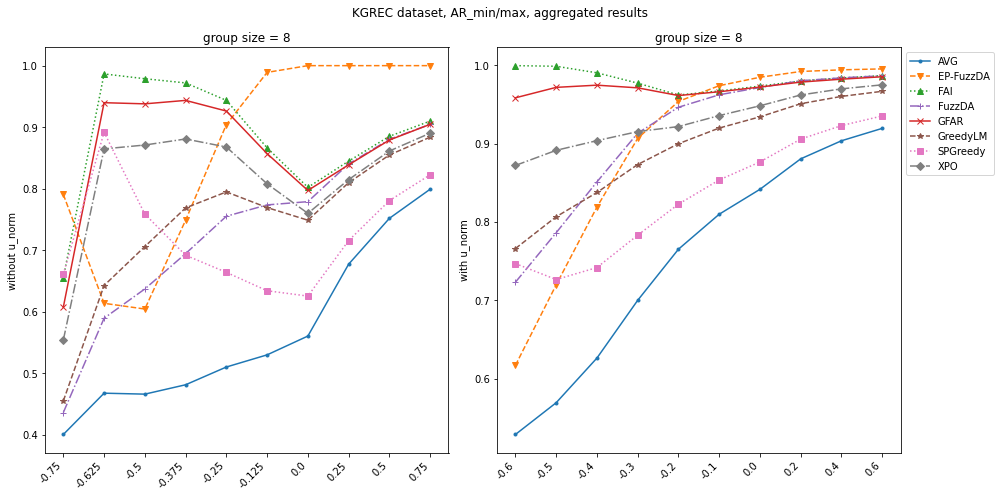

In [316]:
plot_data_2("AR_min/max")

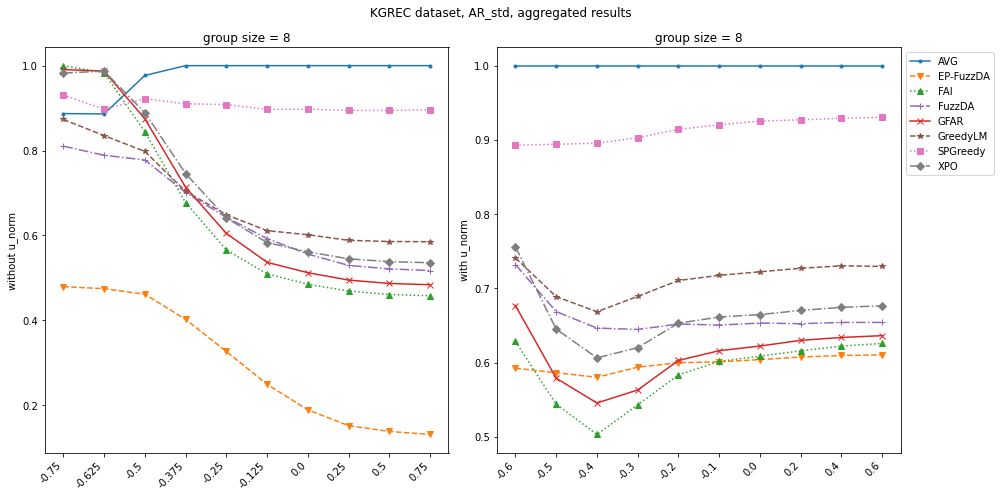

In [317]:
plot_data_2("AR_std")

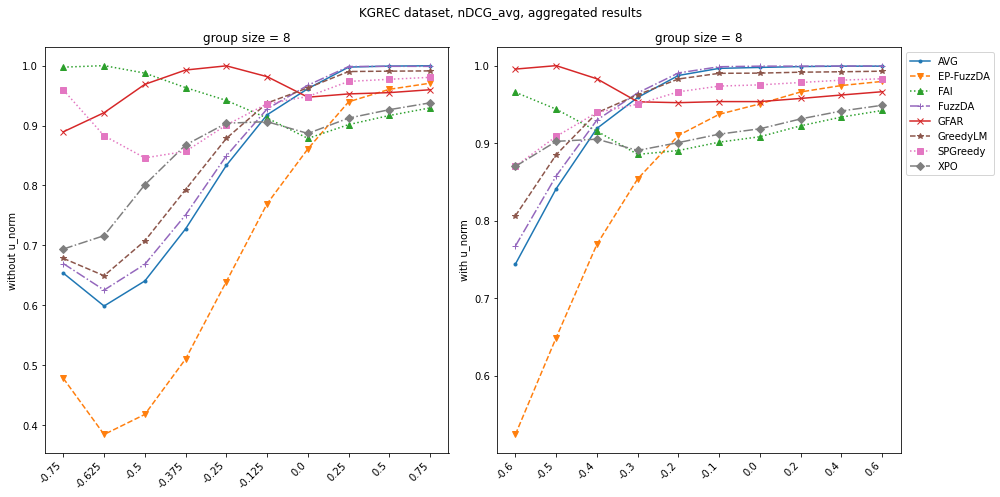

In [318]:
plot_data_2("nDCG_avg")

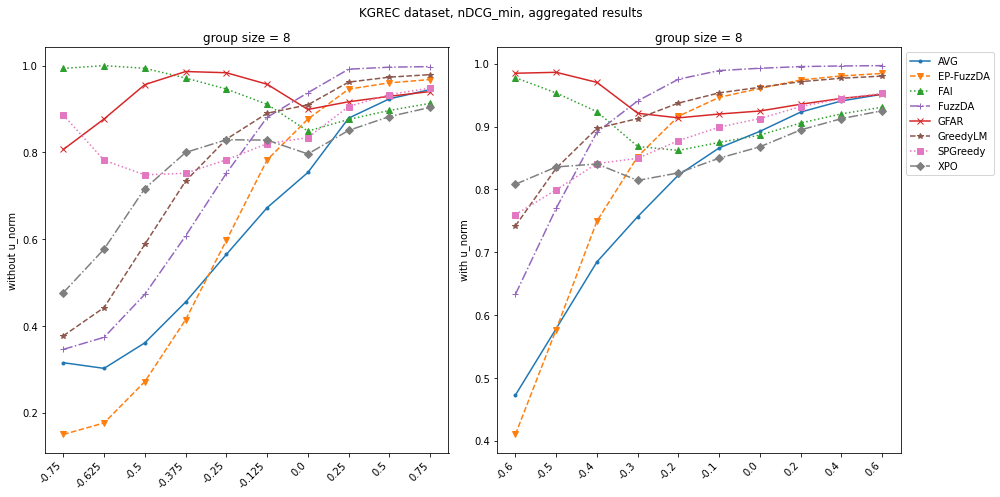

In [319]:
plot_data_2("nDCG_min")

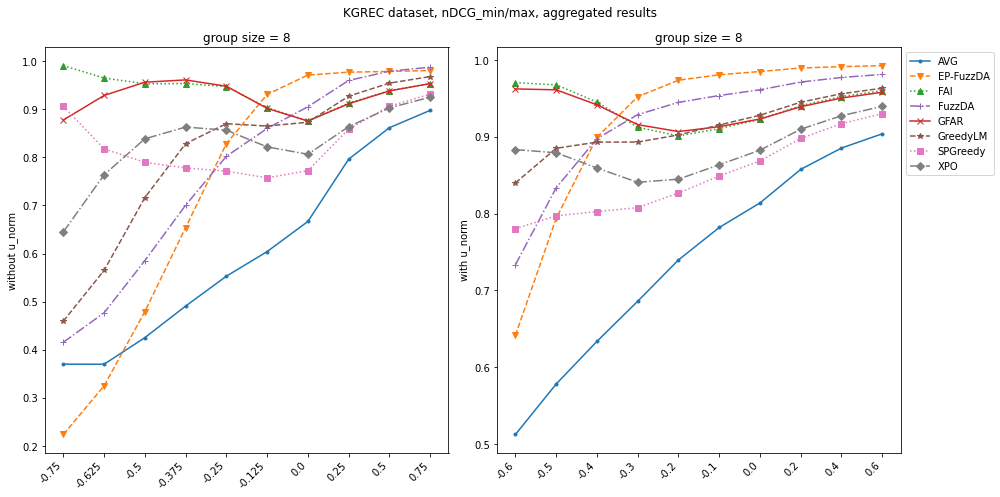

In [320]:
plot_data_2("nDCG_min/max")

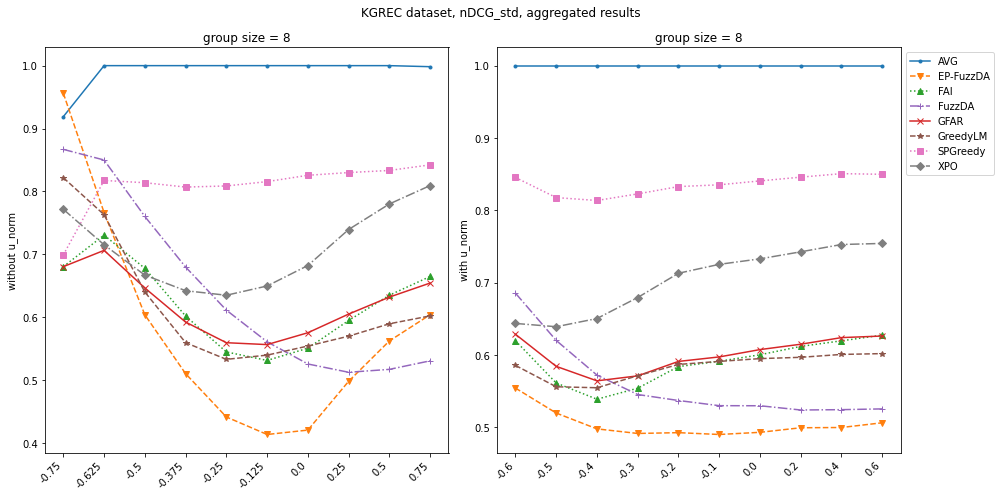

In [321]:
plot_data_2("nDCG_std")

In [326]:
result_dfs[("identity", 0.0)][0]

alg group_type group_size    AR_avg    AR_min  AR_min/max  \
AVG              AVG        sim          2  0.968310  0.846457    0.730435   
EP-FuzzDA  EP-FuzzDA        sim          2  0.809859  0.866142    1.000000   
FuzzDA        FuzzDA        sim          2  0.964789  0.940945    0.858696   
GFAR            GFAR        sim          2  0.992958  0.996063    0.888043   
GreedyLM    GreedyLM        sim          2  1.000000  1.000000    0.889130   
SPGreedy    SPGreedy        sim          2  0.971831  0.858268    0.739130   
FAI              FAI        sim          2  0.989437  0.988189    0.886957   
XPO              XPO        sim          2  0.996479  0.996063    0.889130   

             AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG        1.000000  0.960526  0.881639      0.851812  1.000000  
EP-FuzzDA  0.166667  0.853801  0.822458      0.926439  0.552632  
FuzzDA     0.583333  0.969298  0.949924      0.958422  0.473684  
GFAR       0.500000  1.000000  1.000000      0.990405  0.328947  
GreedyLM   0.500000  0.989766  0.993930      1.000000  0.289474  
SPGreedy   0.966667  0.964912  0.892261      0.864606  0.934211  
FAI        0.500000  0.973684  0.949924      0.947761  0.526316  
XPO        0.500000  0.885965  0.842185      0.905117  0.671053

In [331]:
result_dfs[("identity", 0.0)][3].loc["AVG"].AR_min

0.8289085545722714

In [332]:
result_dfs[("identity", 0.0)][3].loc["EP-FuzzDA"].AR_min

1.0

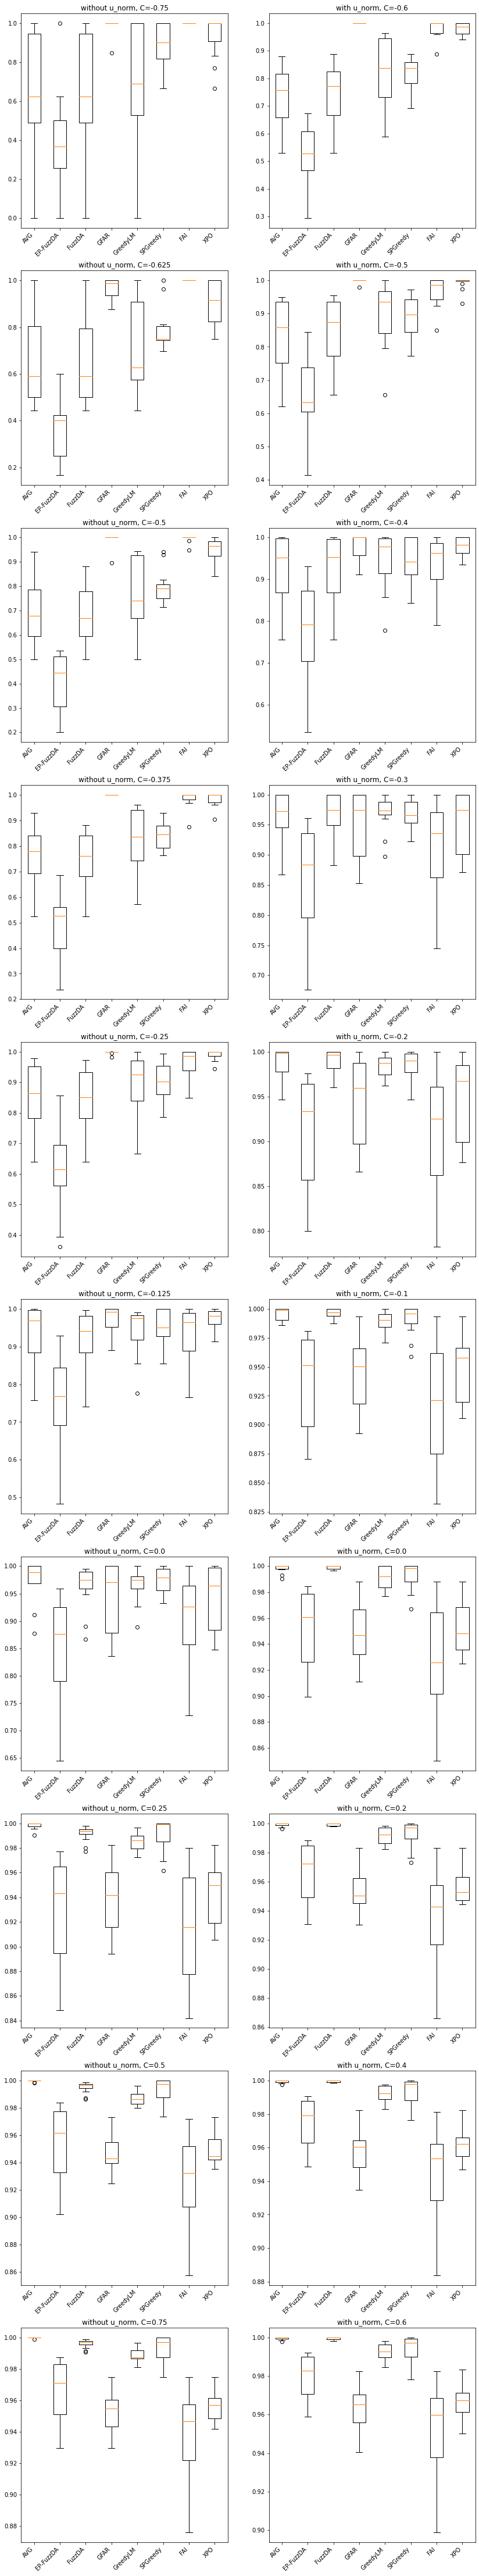

In [352]:
# Aggregated boxplot
algs = result_dfs[("identity", 0.0)][0].alg

fig,ax = plt.subplots(len(c_identity),2,figsize=(14,80),sharex=False)

for i in range(len(c_identity)):
    vals_identity = []
    vals_u_norm = []
    c_id = c_identity[i]
    c_n = c_u_norm[i]
    
    for alg in algs:
        vals_identity.append([x[x.alg==alg]["AR_avg"].values.item() for x in result_dfs[("identity", c_id)]])
        vals_u_norm.append([x[x.alg==alg]["AR_avg"].values.item() for x in result_dfs[("u_norm_min_max_scaler", c_n)]])
    ax[i, 0].boxplot(vals_identity)
    ax[i, 1].boxplot(vals_u_norm)

    ax[i, 0].set_xticks(range(1,len(algs)+1))
    ax[i, 0].set_xticklabels(algs,
                           rotation = 45, ha="right")

    ax[i, 1].set_xticks(range(1,len(algs)+1))
    ax[i, 1].set_xticklabels(algs,
                           rotation = 45, ha="right")

    ax[i, 0].set_title(f"without u_norm, C={c_id}")
    ax[i, 1].set_title(f"with u_norm, C={c_n}")

#print(vals[4])

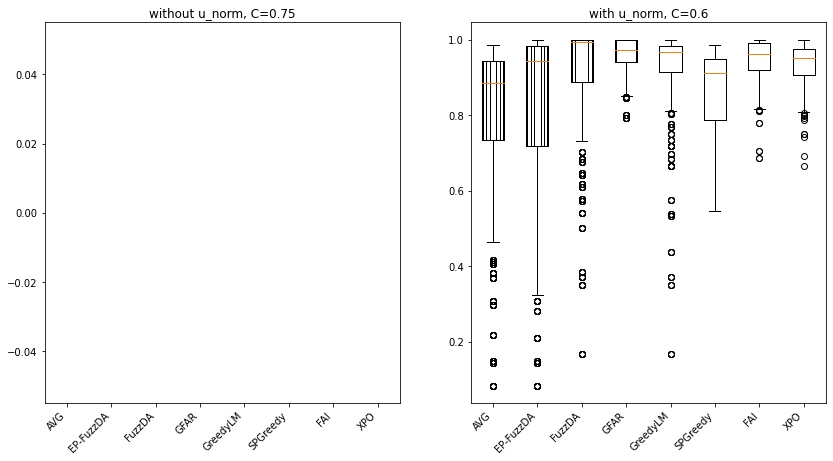

In [356]:
# Aggregated boxplot
algs = result_dfs[("identity", 0.0)][0].alg

fig,ax = plt.subplots(1,2,figsize=(14,7),sharex=False)

vals_identity = []
vals_u_norm = []
for alg in algs:
    vals_identity.append([])
    vals_u_norm.append([])
    for i in range(len(c_identity)):
        c_id = c_identity[i]
        c_n = c_u_norm[i]
        vals_identity[-1].extend([x[x.alg==alg]["AR_min"].values.item() for x in result_dfs[("identity", c_id)]])
        vals_u_norm[-1].extend([x[x.alg==alg]["AR_min"].values.item() for x in result_dfs[("u_norm_min_max_scaler", c_n)]])


    
    
    ax[0].boxplot(vals_identity)
    ax[1].boxplot(vals_u_norm)

    ax[0].set_xticks(range(1,len(algs)+1))
    ax[0].set_xticklabels(algs,
                           rotation = 45, ha="right")

    ax[1].set_xticks(range(1,len(algs)+1))
    ax[1].set_xticklabels(algs,
                           rotation = 45, ha="right")

    ax[0].set_title(f"without u_norm, C={c_id}")
    ax[1].set_title(f"with u_norm, C={c_n}")


In [369]:
# Denormalized (i.e. subtract C), skip norm by /max
df_sorted = df.sort_index()
result_dfs_denormalized = defaultdict(lambda: list())
for n in ["u_norm_min_max_scaler", "identity"]:
    constants = c_u_norm if n == "u_norm_min_max_scaler" else c_identity
    for c in constants:
        for group_type in ["sim", "div"]:
            for group_size in ["2", "4", "8"]:
                for q in [True, False]:
                    d = df_sorted.loc[("norm_shift_nonlinear", c, n, group_type, group_size, q)]
                    d.alg = d.alg.map(get_alg_name)
                    d = d[d.alg.isin(whitelist_mapping.values())]
                    d.index = d.index.map(get_alg_name)
                    for col in ["AR_avg", "AR_min", "AR_min/max", "AR_std", "nDCG_avg", "nDCG_min", "nDCG_min/max", "nDCG_std"]:
                        d[col] = d[col].astype(float)
                    result_dfs_denormalized[(n, c)].append(d)

In [370]:
result_dfs_denormalized[("identity", 0.0)][0]

alg group_type group_size  AR_avg  AR_min  AR_min/max  \
AVG              AVG        sim          2   9.153   6.914       0.628   
EP-FuzzDA  EP-FuzzDA        sim          2   8.561   7.967       0.864   
FuzzDA        FuzzDA        sim          2   8.914   6.723       0.625   
GFAR            GFAR        sim          2   8.894   7.500       0.733   
GreedyLM    GreedyLM        sim          2   9.208   7.740       0.729   
SPGreedy    SPGreedy        sim          2   9.245   7.153       0.648   
FAI              FAI        sim          2   8.849   7.457       0.733   
XPO              XPO        sim          2   8.925   7.524       0.733   

           AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG         2.239     0.744     0.675         0.834     0.069  
EP-FuzzDA   0.594     0.729     0.664         0.841     0.065  
FuzzDA      2.192     0.726     0.656         0.822     0.070  
GFAR        1.394     0.738     0.715         0.940     0.023  
GreedyLM    1.468     0.752     0.728         0.939     0.024  
SPGreedy    2.092     0.742     0.684         0.857     0.058  
FAI         1.392     0.713     0.672         0.892     0.042  
XPO         1.401     0.654     0.607         0.867     0.048

In [371]:
result_dfs_denormalized[("identity", 1.0)][0]

alg group_type group_size  AR_avg  AR_min  AR_min/max  \
AVG              AVG        sim          2  15.801  12.771       0.696   
EP-FuzzDA  EP-FuzzDA        sim          2  15.011  14.353       0.913   
FuzzDA        FuzzDA        sim          2  15.441  12.467       0.695   
GFAR            GFAR        sim          2  14.772  12.991       0.791   
GreedyLM    GreedyLM        sim          2  15.500  13.604       0.788   
SPGreedy    SPGreedy        sim          2  15.867  13.054       0.714   
FAI              FAI        sim          2  14.699  12.913       0.790   
XPO              XPO        sim          2  14.824  13.032       0.790   

           AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG         3.029     0.790     0.735         0.872     0.055  
EP-FuzzDA   0.658     0.774     0.713         0.859     0.060  
FuzzDA      2.974     0.773     0.717         0.862     0.056  
GFAR        1.781     0.754     0.731         0.939     0.024  
GreedyLM    1.896     0.782     0.759         0.942     0.024  
SPGreedy    2.813     0.779     0.732         0.887     0.047  
FAI         1.786     0.728     0.688         0.898     0.040  
XPO         1.792     0.685     0.639         0.876     0.046

In [372]:
result_dfs_denormalized[("identity", 2.0)][0]

alg group_type group_size  AR_avg  AR_min  AR_min/max  \
AVG              AVG        sim          2  24.448  20.628       0.744   
EP-FuzzDA  EP-FuzzDA        sim          2  23.461  22.737       0.939   
FuzzDA        FuzzDA        sim          2  23.968  20.211       0.744   
GFAR            GFAR        sim          2  22.649  20.472       0.830   
GreedyLM    GreedyLM        sim          2  23.792  21.462       0.827   
SPGreedy    SPGreedy        sim          2  24.489  20.956       0.760   
FAI              FAI        sim          2  22.549  20.357       0.828   
XPO              XPO        sim          2  22.722  20.530       0.829   

           AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG         3.820     0.822     0.776         0.896     0.045  
EP-FuzzDA   0.724     0.806     0.751         0.875     0.055  
FuzzDA      3.757     0.807     0.760         0.889     0.047  
GFAR        2.177     0.776     0.753         0.942     0.023  
GreedyLM    2.330     0.808     0.786         0.946     0.023  
SPGreedy    3.534     0.809     0.770         0.908     0.039  
FAI         2.192     0.752     0.714         0.907     0.038  
XPO         2.191     0.718     0.675         0.888     0.043

In [374]:
result_dfs_denormalized[("identity", 3.0)][0]

alg group_type group_size  AR_avg  AR_min  AR_min/max  \
AVG              AVG        sim          2  35.096  30.485       0.779   
EP-FuzzDA  EP-FuzzDA        sim          2  33.911  33.121       0.954   
FuzzDA        FuzzDA        sim          2  34.494  29.955       0.779   
GFAR            GFAR        sim          2  32.526  29.947       0.857   
GreedyLM    GreedyLM        sim          2  34.084  31.315       0.854   
SPGreedy    SPGreedy        sim          2  35.111  30.856       0.794   
FAI              FAI        sim          2  32.399  29.796       0.856   
XPO              XPO        sim          2  32.620  30.024       0.857   

           AR_std  nDCG_avg  nDCG_min  nDCG_min/max  nDCG_std  
AVG         4.610     0.846     0.807         0.913     0.039  
EP-FuzzDA   0.790     0.830     0.780         0.889     0.050  
FuzzDA      4.540     0.832     0.792         0.907     0.040  
GFAR        2.579     0.797     0.775         0.946     0.022  
GreedyLM    2.768     0.830     0.808         0.950     0.021  
SPGreedy    4.255     0.832     0.799         0.923     0.033  
FAI         2.604     0.774     0.739         0.915     0.035  
XPO         2.596     0.746     0.706         0.899     0.040

In [375]:
print(32.399 - 22.549)
print(22.549 - 14.699)
print(14.699 - 8.849)

9.850000000000001
7.85
5.85


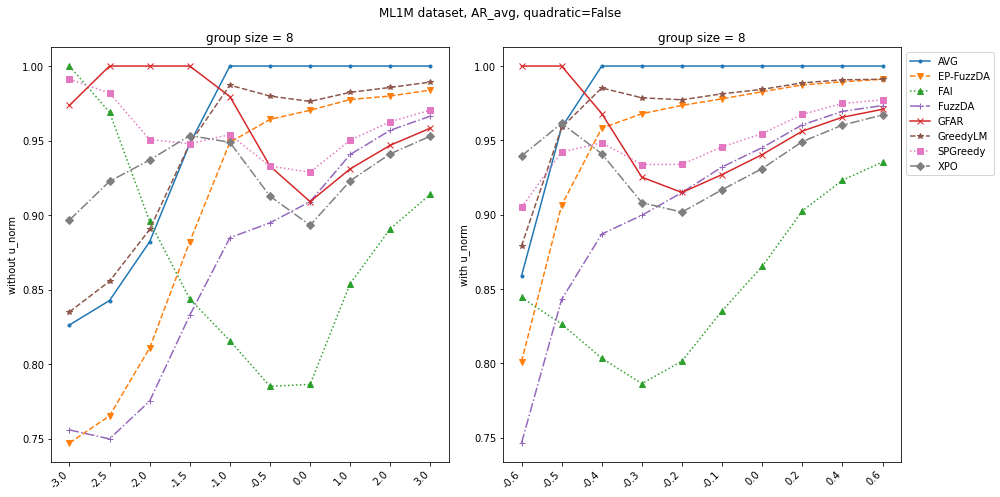

In [382]:
# Plot data - single plot just for comparison in paper
df_identity, df_u_norm = get_df_data(False, "nDCG_avg", group_type)

#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(1,2,figsize=(14,7),sharex=False)
i = 0
for d in [df_identity, df_u_norm]:
    j = 0
    for size in ["8"]:               
        #vals = df_dictionary[(sim,size)][AR_avg]
        vals = d[size]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i].plot(vals.loc[a].values, marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1

ax[0].set_xticks(range(len(c_identity)))
ax[0].set_xticklabels(c_identity,
                       rotation = 45, ha="right")

ax[1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0].set_title("group size = 8")
ax[1].set_title("group size = 8")

ax[0].set_ylabel("without u_norm")
ax[1].set_ylabel("with u_norm")

ax[1].set_xticks(range(len(c_u_norm)))
ax[1].set_xticklabels(c_u_norm,
                       rotation = 45, ha="right")

fig.suptitle(f"{dataset} dataset, AR_avg, quadratic={False}")
plt.tight_layout()